Data wrangling is the process of reshaping, aggregating, separating, or otherwise transforming your data from one format to a more useful one.

For example, let’s say we wanted to run a step-forward analysis of a very rudimentary momentum trading strategy that goes as follows:

At the start of every month, we buy the cryptocurrency that had the largest price gain over the previous 7, 14, 21, or 28 days. We want to evaluate each of these time windows.
Then, we hold for exactly 7 days and sell our position. Please note: this is a purposefully simple strategy that is only meant for illustrative purposes.

This price dataset managed by Brave New Coin and distributed on Quandl. 
The full version tracks price indices for 1,900+ fiat-crypto trading pairs

(Quandl is a platform for financial, economic, and alternative data that serves investment professionals. Quandl sources data from over 500 publishers. All Quandl's data are accessible via an API.) test


In [1]:
import pandas as pd

#Pandas display settings

# Display floats with 2 decimal places to make the data set look less messy. 
pd.options.display.float_format = '{:,.2f}'.format
 
# Expand display limits for the number of rows and columns displayed.
pd.options.display.max_rows = 200
pd.options.display.max_columns = 100

In [2]:
# Read BNC2 with no parameters

dfwrong = pd.read_csv('BNC2_sample.csv')
dfwrong.head(10)

,GWA_BTC,2014-04-01,467.27616213,488.62262576,467.27616213.1,479.56253758,74776.47884546,482.75743985,482.81552999
0,GWA_BTC,2014-04-02,479.20,494.30,431.32,437.08,"114,052.96",460.19,465.93
1,GWA_BTC,2014-04-03,437.33,449.74,414.41,445.60,"91,415.08",432.29,433.28
2,GWA_BTC,2014-04-04,445.18,456.10,429.16,449.81,"51,147.27",443.46,443.93
3,GWA_BTC,2014-04-05,450.08,464.09,445.16,461.70,"28,449.19",452.53,452.95
4,GWA_BTC,2014-04-06,463.18,469.17,451.13,461.02,"21,720.64",460.92,460.89
5,GWA_BTC,2014-04-07,461.84,464.27,445.43,452.90,"34,949.20",455.32,455.75
6,GWA_BTC,2014-04-08,450.07,462.73,447.96,452.90,"24,290.14",453.96,453.90
7,GWA_BTC,2014-04-09,454.86,464.37,442.96,449.30,"30,135.25",450.43,451.08
8,GWA_BTC,2014-04-10,449.72,449.72,358.70,366.77,"149,892.25",401.84,409.43
9,GWA_BTC,2014-04-11,364.25,430.13,349.20,421.79,"151,050.95",404.00,403.60


In [3]:
# Read BNC2 sample dataset
df = pd.read_csv('BNC2_sample.csv',
                 names=['Code', 'Date', 'Open', 'High', 'Low', 
                        'Close', 'Volume', 'VWAP', 'TWAP'])

df.head(10)

,Code,Date,Open,High,Low,Close,Volume,VWAP,TWAP
0,GWA_BTC,2014-04-01,467.28,488.62,467.28,479.56,"74,776.48",482.76,482.82
1,GWA_BTC,2014-04-02,479.20,494.30,431.32,437.08,"114,052.96",460.19,465.93
2,GWA_BTC,2014-04-03,437.33,449.74,414.41,445.60,"91,415.08",432.29,433.28
3,GWA_BTC,2014-04-04,445.18,456.10,429.16,449.81,"51,147.27",443.46,443.93
4,GWA_BTC,2014-04-05,450.08,464.09,445.16,461.70,"28,449.19",452.53,452.95
5,GWA_BTC,2014-04-06,463.18,469.17,451.13,461.02,"21,720.64",460.92,460.89
6,GWA_BTC,2014-04-07,461.84,464.27,445.43,452.90,"34,949.20",455.32,455.75
7,GWA_BTC,2014-04-08,450.07,462.73,447.96,452.90,"24,290.14",453.96,453.90
8,GWA_BTC,2014-04-09,454.86,464.37,442.96,449.30,"30,135.25",450.43,451.08
9,GWA_BTC,2014-04-10,449.72,449.72,358.70,366.77,"149,892.25",401.84,409.43


In [4]:
df.shape

(31761, 9)

Data Dictionary (for code GWA_BTC):

Date: The day on which the index values were calculated.
Open: The day's opening price index for Bitcoin in US dollars.
High: The highest value for the price index for Bitcoin in US dollars that day.
Low: The lowest value for the price index for Bitcoin in US dollars that day.
Close: The day's closing price index for Bitcoin in US dollars.
Volume: The volume of Bitcoin traded that day.
VWAP: The volume weighted average price of Bitcoin traded that day.
TWAP: The time-weighted average price of Bitcoin traded that day.

One of the most common reasons to wrangle data is when there's "too much" information packed into a single table, especially when dealing with time series data.

Generally, all observations should be equivalent in granularity and in units.

There will be exceptions, but for the most part, this rule of thumb can save you from many headaches.

##Equivalence in Granularity - For example, you could have 10 rows of data from 10 different cryptocurrencies. However, you should not have an 11th row with average or total values from the other 10 rows. That 11th row would be an aggregation, and thus not equivalent in granularity to the other 10.
##Equivalence in Units - You could have 10 rows with prices in USD collected at different dates. However, you should not then have another 10 rows with prices quoted in EUR. Any aggregations, distributions, visualizations, or statistics would become meaningless.

Data stored in CSV files or databases are often in “stacked” or “record” format. They use a single  'Code' column as a catch-all for metadata. For example, in the sample dataset, we have the follow codes:

In [5]:
df.head(10)

,Code,Date,Open,High,Low,Close,Volume,VWAP,TWAP
0,GWA_BTC,2014-04-01,467.28,488.62,467.28,479.56,"74,776.48",482.76,482.82
1,GWA_BTC,2014-04-02,479.20,494.30,431.32,437.08,"114,052.96",460.19,465.93
2,GWA_BTC,2014-04-03,437.33,449.74,414.41,445.60,"91,415.08",432.29,433.28
3,GWA_BTC,2014-04-04,445.18,456.10,429.16,449.81,"51,147.27",443.46,443.93
4,GWA_BTC,2014-04-05,450.08,464.09,445.16,461.70,"28,449.19",452.53,452.95
5,GWA_BTC,2014-04-06,463.18,469.17,451.13,461.02,"21,720.64",460.92,460.89
6,GWA_BTC,2014-04-07,461.84,464.27,445.43,452.90,"34,949.20",455.32,455.75
7,GWA_BTC,2014-04-08,450.07,462.73,447.96,452.90,"24,290.14",453.96,453.90
8,GWA_BTC,2014-04-09,454.86,464.37,442.96,449.30,"30,135.25",450.43,451.08
9,GWA_BTC,2014-04-10,449.72,449.72,358.70,366.77,"149,892.25",401.84,409.43


In [6]:
# Unique codes in the dataset
print( df.Code.unique() )


['GWA_BTC' 'GWA_ETH' 'GWA_LTC' 'GWA_XLM' 'GWA_XRP' 'MWA_BTC_CNY'
 'MWA_BTC_EUR' 'MWA_BTC_GBP' 'MWA_BTC_JPY' 'MWA_BTC_USD' 'MWA_ETH_CNY'
 'MWA_ETH_EUR' 'MWA_ETH_GBP' 'MWA_ETH_JPY' 'MWA_ETH_USD' 'MWA_LTC_CNY'
 'MWA_LTC_EUR' 'MWA_LTC_GBP' 'MWA_LTC_JPY' 'MWA_LTC_USD' 'MWA_XLM_CNY'
 'MWA_XLM_EUR' 'MWA_XLM_USD' 'MWA_XRP_CNY' 'MWA_XRP_EUR' 'MWA_XRP_GBP'
 'MWA_XRP_JPY' 'MWA_XRP_USD']


First, see how some codes start with GWA and others with MWA? These are actually completely different types of indicators according to the documentation page.

##MWA stands for "market-weighted average," and they show regional prices. There are multiple MWA codes for each cryptocurrency, one for each local fiat currency.

##On the other hand, GWA stands for "global-weighted average," which shows globally indexed prices. GWA is thus an aggregation of MWA and not equivalent in granularity. (Note: only a subset of regional MWA codes are included in the sample dataset.)

In [7]:
# Example of GWA and MWA relationship
df[df.Code.isin(['GWA_BTC', 'MWA_BTC_JPY', 'MWA_BTC_EUR']) 
   & (df.Date == '2018-01-01')]

,Code,Date,Open,High,Low,Close,Volume,VWAP,TWAP
1371,GWA_BTC,2018-01-01,"14,505.89","14,505.89","13,617.46","14,092.74","225,906.21","14,103.18","14,093.73"
9074,MWA_BTC_EUR,2018-01-01,"11,859.35","11,859.35","11,111.07","11,403.92","14,933.73","11,488.45","11,478.08"
11838,MWA_BTC_JPY,2018-01-01,"1,674,341.45","1,678,567.55","1,572,173.90","1,632,657.51","68,611.95","1,632,994.40","1,631,407.66"


There are multiple entries for a cryptocurrency on a given date. To further complicate things, the regional MWA data are denominated in their local currency (i.e. nonequivalent units), so you would also need historical exchange rates.

Step 4: Filter unwanted observations.
One of the simplest yet most useful data wrangling techniques is removing unwanted observations.

In the previous step, we learned that GWA codes are aggregations of the regional MWA codes. Therefore, to perform our analysis, we only need to keep the global GWA codes:

In [8]:
# Number of observations in dataset
print( 'Before:', len(df) )
 
# Get all the GWA codes
gwa_codes = [code for code in df.Code.unique() if 'GWA_' in code]
 
# Only keep GWA observations
df = df[df.Code.isin(gwa_codes)]
 
# Number of observations left
print( 'After:', len(df) )

Before: 31761
After: 6309


In [9]:
print( df.Code.unique() )

['GWA_BTC' 'GWA_ETH' 'GWA_LTC' 'GWA_XLM' 'GWA_XRP']


In [10]:
df.shape

(6309, 9)

For each cryptocurrency, we'll need calculate returns over the prior 7, 14, 21, and 28 days... for the first day of each month.

However, it would be a huge pain to do so with the current "stacked" dataset. It would involve writing helper functions, loops, and plenty of conditional logic. Instead, we'll take a more elegant approach.
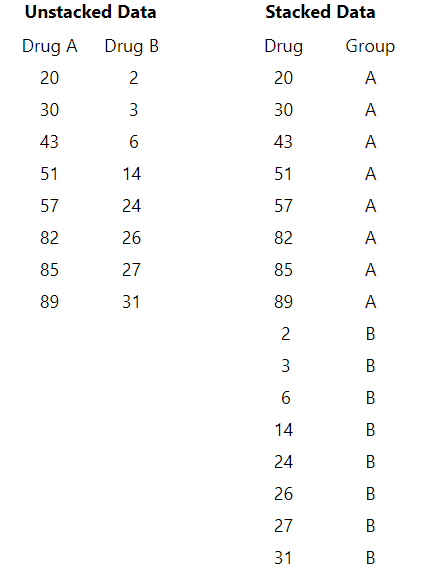

First, we'll pivot the dataset while keeping only one price column. For this tutorial, let's keep the VWAP (volume weighted average price) column, but you could make a good case for most of them.

In [11]:
# Pivot dataset
pivoted_df = df.pivot(index='Date', columns='Code', values='VWAP')

In [12]:
pivoted_df.tail()

Code,GWA_BTC,GWA_ETH,GWA_LTC,GWA_XLM,GWA_XRP
Date,,,,,
2018-01-19,"11,826.36","1,068.45",195.00,0.51,1.82
2018-01-20,"13,062.68","1,158.71",207.58,0.52,1.75
2018-01-21,"12,326.23","1,108.90",197.36,0.48,1.55
2018-01-22,"11,397.52","1,038.21",184.92,0.47,1.43
2018-01-23,"10,921.00",992.05,176.95,0.47,1.42


Step 6: Shift the pivoted dataset.
To easily calculate returns over the prior 7, 14, 21, and 28 days, we can use Pandas's shift method.

In [13]:
print( pivoted_df.tail(3).shift(1))

Code         GWA_BTC  GWA_ETH  GWA_LTC  GWA_XLM  GWA_XRP
Date                                                    
2018-01-21       nan      nan      nan      nan      nan
2018-01-22 12,326.23 1,108.90   197.36     0.48     1.55
2018-01-23 11,397.52 1,038.21   184.92     0.47     1.43


In [14]:
print( pivoted_df.tail(3).shift(1) )

Code         GWA_BTC  GWA_ETH  GWA_LTC  GWA_XLM  GWA_XRP
Date                                                    
2018-01-21       nan      nan      nan      nan      nan
2018-01-22 12,326.23 1,108.90   197.36     0.48     1.55
2018-01-23 11,397.52 1,038.21   184.92     0.47     1.43


In [15]:
#Notice how the shifted dataset now has values from 1 day before? 
#We can take advantage of this to calculate prior returns for our 7, 14, 21, 28 day windows.

#For example, to calculate returns over the 7 days prior,
#we would need  prices_today / prices_7_days_ago - 1.0, which translates to:

#Calculate returns over 7 days prior

# Calculate returns over 7 days prior
delta_7 = pivoted_df / pivoted_df.shift(7) - 1.0
 
# Display examples
delta_7.tail()

Code,GWA_BTC,GWA_ETH,GWA_LTC,GWA_XLM,GWA_XRP
Date,,,,,
2018-01-19,-0.18,-0.17,-0.18,-0.21,-0.22
2018-01-20,-0.13,-0.19,-0.18,-0.23,-0.29
2018-01-21,-0.15,-0.20,-0.22,-0.22,-0.30
2018-01-22,-0.21,-0.24,-0.24,-0.25,-0.32
2018-01-23,-0.11,-0.12,-0.13,-0.02,-0.04


In [16]:
#Calculating returns for all of the week, 2 weeks, 3, weeks, and month windows is as easy as writing a loop 
#and storing them in a dictionary:

delta_dict = {}
for offset in [7, 14, 21, 28]:
    delta_dict['delta_{}'.format(offset)] = pivoted_df / pivoted_df.shift(offset) #this is the entire dataset!

Note: Calculating returns by shifting the dataset requires 2 assumptions to be met: (1) the observations are sorted ascending by date and (2) there are no missing dates. We checked this "off-stage" to keep this tutorial concise, but we recommend confirming this on your own.

Step 7: Melt the shifted dataset.
Now that we've calculated returns using the pivoted dataset, we're going to "unpivot" the returns. By unpivoting, or melting the data, we can later create an analytical base table (ABT) where each row contains all of the relevant information for a particular coin on a particular date.

To melt the data, we'll...

reset_index() so we can call the columns by name.
Call the  melt() method.
Pass the column(s) to keep into the  id_vars= argument.
Name the melted column using the  value_name= argument.
Here's how that looks for one dataframe:

In [17]:
# Melt delta_7 returns
melted_7 = delta_7.reset_index().melt(id_vars=['Date'], value_name='delta_7')
 
# Melted dataframe examples
melted_7.tail()

,Date,Code,delta_7
6965,2018-01-19,GWA_XRP,-0.22
6966,2018-01-20,GWA_XRP,-0.29
6967,2018-01-21,GWA_XRP,-0.30
6968,2018-01-22,GWA_XRP,-0.32
6969,2018-01-23,GWA_XRP,-0.04


In [18]:
# Melt all the delta dataframes and store in list
melted_dfs = []
for key, delta_df in delta_dict.items():
    melted_dfs.append( delta_df.reset_index().melt(id_vars=['Date'], value_name=key))

Finally, we can create another melted dataframe that contains the forward-looking 7-day returns. This will be our "target variable" for evaluating our trading strategy.

In [19]:
# Calculate 7-day returns after the date
return_df = pivoted_df.shift(-7) / pivoted_df - 1.0
 
# Melt the return dataset and append to list
melted_dfs.append( return_df.reset_index().melt(id_vars=['Date'], value_name='return_7') )

**We now have 5 melted dataframes stored in the  melted_dfs list, one for each of the backward-looking 7, 14, 21, and 28-day returns and one for the forward-looking 7-day returns.**

All that's left to do is join our melted dataframes into a single analytical base table. We'll need two tools.

The first is Pandas's merge function, which works like SQL JOIN. 

In [20]:
#Merge two dataframes

# Merge two dataframes
pd.merge(melted_dfs[0], melted_dfs[1], on=['Date', 'Code']).tail()

,Date,Code,delta_7,delta_14
6965,2018-01-19,GWA_XRP,0.78,0.59
6966,2018-01-20,GWA_XRP,0.71,0.58
6967,2018-01-21,GWA_XRP,0.70,0.49
6968,2018-01-22,GWA_XRP,0.68,0.48
6969,2018-01-23,GWA_XRP,0.96,0.52


However, the most elegant way to do this is using Python's built-in reduce function.

In [21]:
from functools import reduce

In [22]:
# Grab features from original dataset
base_df = df[['Date', 'Code', 'Volume', 'VWAP']]
 
# Create a list with all the feature dataframes
feature_dfs = [base_df] + melted_dfs

Now we're ready to use the reduce function. Reduce applies a function of two arguments cumulatively to the objects in a sequence (e.g. a list). For example,  reduce(lambda x,y: x+y, [1,2,3,4,5]) calculates  ((((1+2)+3)+4)+5).

Thus, we can reduce-merge all of the features like so:

In [23]:
abt = reduce(lambda left,right: pd.merge(left,right,on=['Date', 'Code']), feature_dfs)
 
# Display examples from the ABT
abt.tail(10)

,Date,Code,Volume,VWAP,delta_7,delta_14,delta_21,delta_28,return_7
6299,2018-01-14,GWA_XRP,"912,107,674.18",2.20,0.69,1.02,2.06,2.97,-0.30
6300,2018-01-15,GWA_XRP,"823,491,754.55",2.11,0.71,0.96,1.92,2.84,-0.32
6301,2018-01-16,GWA_XRP,"3,872,977,355.95",1.48,0.54,0.64,1.35,1.85,-0.04
6302,2018-01-17,GWA_XRP,"5,111,390,628.85",1.20,0.53,0.43,0.94,1.58,nan
6303,2018-01-18,GWA_XRP,"5,156,172,462.44",1.68,0.78,0.49,1.23,1.59,nan
6304,2018-01-19,GWA_XRP,"2,126,239,927.56",1.82,0.78,0.59,1.02,1.65,nan
6305,2018-01-20,GWA_XRP,"1,346,913,296.52",1.75,0.71,0.58,0.74,1.53,nan
6306,2018-01-21,GWA_XRP,"1,886,060,450.81",1.55,0.70,0.49,0.72,1.45,nan
6307,2018-01-22,GWA_XRP,"1,784,992,299.63",1.43,0.68,0.48,0.65,1.30,nan
6308,2018-01-23,GWA_XRP,"2,118,335,564.32",1.42,0.96,0.52,0.61,1.29,nan


**Data Dictionary for our Analytical Base Table (ABT):**

Date: The day on which the index values were calculated.
Code: Which cryptocurrency.
VWAP: The volume weighted average price traded that day.
delta_7: Return over the prior 7 days (1.0 = 100% return).
delta_14: Return over the prior 14 days (1.0 = 100% return).
delta_21: Return over the prior 21 days (1.0 = 100% return).
delta_28: Return over the prior 28 days (1.0 = 100% return).
return_7: Future return over the next 7 days (1.0 = 100% return).

By the way, notice how the last 7 observations don't have values for the  'return_7' feature? This is expected, as we cannot calculate "future 7-day returns" for the last 7 days of the dataset.

Technically, with this ABT, we can already answer our original objective. For example, if we wanted to pick the coin that had the biggest momentum on September 1st, 2017, we could simply display the rows for that date and look at the 7, 14, 21, and 28-day prior returns:

In [24]:
# Data from Sept 1st, 2017
abt[abt.Date == '2017-09-01']

,Date,Code,Volume,VWAP,delta_7,delta_14,delta_21,delta_28,return_7
1249,2017-09-01,GWA_BTC,"275,034.79","4,798.06",1.10,1.12,1.35,1.69,-0.09
2149,2017-09-01,GWA_ETH,"2,076,778.42",387.55,1.17,1.28,1.29,1.72,-0.21
3543,2017-09-01,GWA_LTC,"18,553,463.67",78.76,1.55,1.71,1.68,1.82,-0.10
4770,2017-09-01,GWA_XLM,"372,143,342.95",0.02,1.19,1.34,1.05,1.10,-0.19
6164,2017-09-01,GWA_XRP,"1,138,500,431.07",0.25,1.15,1.57,1.39,1.44,-0.14


In [25]:
#if you wanted to programmatically pick the crypto with the biggest momentum 
#(e.g. over the prior 28 days), you would write:

max_momentum_id = abt[abt.Date == '2017-09-01'].delta_28.idxmax()
daily_df.loc[max_momentum_id, ['Code','return_7']

SyntaxError: unexpected EOF while parsing (<ipython-input-25-e7de1023a948>, line 5)

However, since we're only interested in trading on the first day of each month, we can make things even easier for ourselves...

Step 9: (Optional) Aggregate with group-by.
As a final step, if we wanted to only keep the first days of each month, we can use a group-by followed by an aggregation.

First, create a new 'month'  feature from the first 7 characters of the Date strings.
Then, group the observations by  'Code' and by  'month'. Pandas will create "cells" of data that separate observations by Code and month.
Finally, within each group, simply take the  .first() observation and reset the index.

In [ ]:
# Create 'month' feature
abt['month'] = abt.Date.apply(lambda x: x[:7])
 
# Group by 'Code' and 'month' and keep first date
gb_df = abt.groupby(['Code', 'month']).first().reset_index()
 
# Display examples
gb_df.tail()

As you can see, we now have a proper ABT with:

Only relevant data from the 1st day of each month.
Momentum features calculated from the prior 7, 14, 21, and 28 days.
The future returns you would've made 7 days later.
In other words, we have exactly what we need to evaluate the simple trading strategy we proposed at the beginning!

In [ ]:
# 2. Import libraries and dataset
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format
pd.options.display.max_rows = 200
pd.options.display.max_columns = 100
 
df = pd.read_csv('BNC2_sample.csv',
                 names=['Code', 'Date', 'Open', 'High', 'Low', 
                        'Close', 'Volume', 'VWAP', 'TWAP'])
 
# 4. Filter unwanted observations
gwa_codes = [code for code in df.Code.unique() if 'GWA_' in code]
df = df[df.Code.isin(gwa_codes)]
 
# 5. Pivot the dataset
pivoted_df = df.pivot(index='Date', columns='Code', values='VWAP')
 
# 6. Shift the pivoted dataset
delta_dict = {}
for offset in [7, 14, 21, 28]:
    delta_dict['delta_{}'.format(offset)] = pivoted_df / pivoted_df.shift(offset) - 1
    
# 7. Melt the shifted dataset
melted_dfs = []
for key, delta_df in delta_dict.items():
    melted_dfs.append( delta_df.reset_index().melt(id_vars=['Date'], value_name=key) )
 
return_df = pivoted_df.shift(-7) / pivoted_df - 1.0
melted_dfs.append( return_df.reset_index().melt(id_vars=['Date'], value_name='return_7') )
 
# 8. Reduce-merge the melted data
from functools import reduce
 
base_df = df[['Date', 'Code', 'Volume', 'VWAP']]
feature_dfs = [base_df] + melted_dfs
 
abt = reduce(lambda left,right: pd.merge(left,right,on=['Date', 'Code']), feature_dfs)
 
# 9. Aggregate with group-by.
abt['month'] = abt.Date.apply(lambda x: x[:7])
gb_df = abt.groupby(['Code', 'month']).first().reset_index()